In [15]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image
from tensorflow .keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

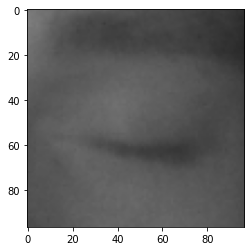

In [16]:
img = image.load_img("/content/drive/MyDrive/eye/train/Closed_Eyes/s0001_00198_0_0_0_0_0_01.png")
plt.imshow(img)

In [17]:
cv2.imread("/content/drive/MyDrive/eye/train/Closed_Eyes/s0001_00198_0_0_0_0_0_01.png").shape

(97, 97, 3)

In [18]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [19]:
train_batches=train.flow_from_directory('/content/drive/MyDrive/eye/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 3356 images belonging to 2 classes.


In [20]:
test_batches=test.flow_from_directory('/content/drive/MyDrive/eye/test',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 648 images belonging to 2 classes.


In [7]:
train_batches.class_indices

{'Closed_Eyes': 0, 'Open_Eyes': 1}

In [82]:
train_batches.classes.shape

(3356,)

In [8]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, SpatialDropout2D, Flatten, Dropout, Dense
from sklearn.metrics import classification_report

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [10]:
model.add(Flatten())
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 256)      0         
 2D)                                                    

In [14]:
model_saved=model.fit_generator(train_batches,epochs=7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/7
168/168 [==============================] - 1344s 8s/step - loss: 0.2857 - accuracy: 0.8957
Epoch 2/7
168/168 [==============================] - 1300s 8s/step - loss: 0.0544 - accuracy: 0.9839
Epoch 3/7
168/168 [==============================] - 1307s 8s/step - loss: 0.1443 - accuracy: 0.9687
Epoch 4/7
168/168 [==============================] - 1316s 8s/step - loss: 0.3070 - accuracy: 0.9502
Epoch 5/7
168/168 [==============================] - 1307s 8s/step - loss: 0.0290 - accuracy: 0.9902
Epoch 6/7
168/168 [==============================] - 1313s 8s/step - loss: 0.0124 - accuracy: 0.9958
Epoch 7/7
168/168 [==============================] - 1306s 8s/step - loss: 0.0090 - accuracy: 0.9976


In [59]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_batches, batch_size=16)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
#print(classification_report(test_batches.argmax(axis=1), predIdxs,
    #target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving model...")
model.save("CloseOrOpenEye.model", save_format="h5")

[INFO] evaluating network...
[INFO] saving model...


[[0.]]
closed Eye


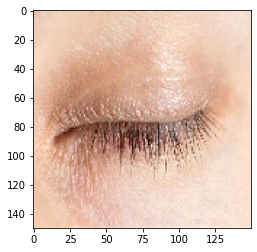

In [134]:
img_prd = image.load_img('/content/th.jpg', target_size=(150,150))
p = image.img_to_array(img_prd)
p = np.expand_dims(p, axis = 0)
res = model.predict(p)
print(res)
if res == 0:
    print("closed Eye")
else:
    print("Open Eye")

plt.imshow(img_prd)

In [119]:
img= 'C:/Users/HI/Downloads/OIP (2).jpg'
img = cv2.imread(img)

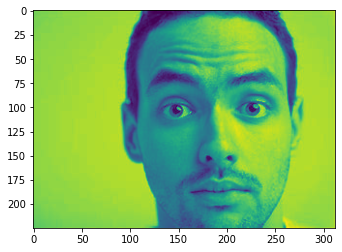

In [120]:
img = cv2.imread('/content/OIP (2).jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img);

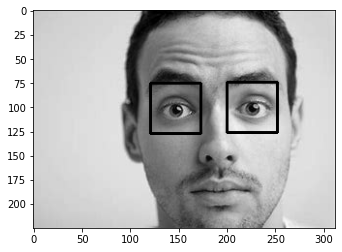

In [121]:
gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)#converting the input image to greay image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    cv2.rectangle(img,(x,y),(x+w ,y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [122]:
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

In [123]:
eyes_roi.shape
final_image = cv2.resize(eyes_roi,(150,150))

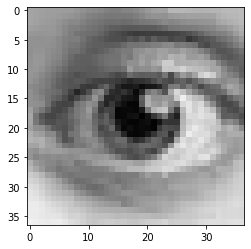

In [124]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))


In [125]:
final = cv2.resize(eyes_roi,(224,224))

In [126]:
final_image = np.expand_dims(final_image, axis = 0)

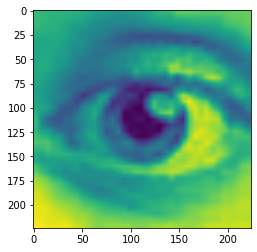

In [127]:
plt.imshow(final)

In [141]:
#res = model.predict(final)
#print(res)
predIdxs = np.argmax(final, axis=1)
print(predIdxs)
if predIdxs[0] == 0 :
    prediction_class = 'Closed'

else :
    prediction_class = 'Open'

print(prediction_class)


[220 220 220 220 220 220 220 220 221 221 220 220 221 220 220 220 220 221
 220 221 221 220 221 220 221 220 221 221 221 221 221 221 221 221 221 221
   0   8   8   6   6   9 141 140 136 160 160 160 160 160 148 148 148 148
 148 147 146 142 142 142 142 142 160 160 160 160 184 184 184 184 184 184
 184 188 190 190 209 209 208 209 208 208 209 209 154 154 154 154 154 154
 159 160 160 160 160 160 160 160 166 166 166 166 166 166 166 166 166 166
 178 178 178 178 178 178 178 177 172 172 172 172 172 172 172 172 172 172
 172 166 166 166 166 166 166 178 178 178 178 178 160 160 160 160 160 160
 172 172 171 167 166 166 166 166 182 183 182 178 160 160 160 160 159 153
 147 147 142 142 142 142 142 220 220 220 221   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   8   7   7   8   7   8   0   0   0   0
   0   0   0   0   0   0   0   0]
Open
